In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import xrft

In [18]:
dt = np.dtype([('re', np.int16), ('im', np.int16)])

a = np.fromfile(f'out-00.dat', dtype=dt)
			

b = np.zeros(len(a), dtype=np.complex64)
b[:].real = a['re']/(2**15)
b[:].imag = a['im']/(2**15)

sample_rate = int(250e3)

# keep the middle 2 seconds
b = b[sample_rate:-sample_rate]


bins = 1024
N = len(b)//bins
b = np.split(b[-N*bins:], N)


In [19]:

da = xr.DataArray(b, dims=["seq","data"])
da_fft = xrft.fft(da, dim='data', shift=True)

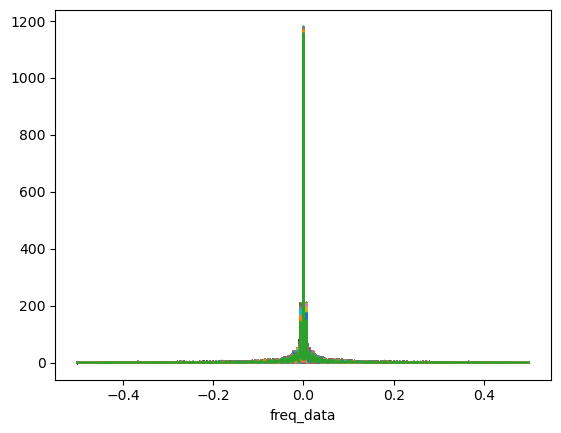

In [22]:
mag_fft = np.abs(da_fft)

mag_fft.plot(x="freq_data", hue="seq", add_legend=False)


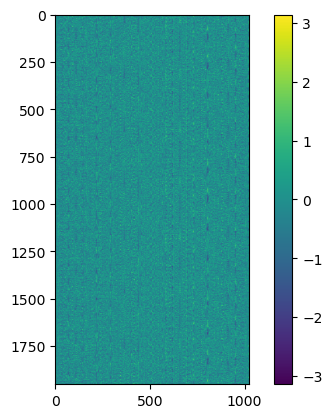

In [23]:
x= np.angle(da_fft)
plt.imshow(x);
plt.colorbar();




In [26]:
#get bin with heighest power

max_bins = mag_fft.argmax(dim="freq_data")

print(max_bins)


<xarray.DataArray (seq: 1953)>
array([512, 512, 512, ..., 512, 512, 512], dtype=int64)
Dimensions without coordinates: seq


std: 0.004605273102467117
mean: 0.7582005213087222


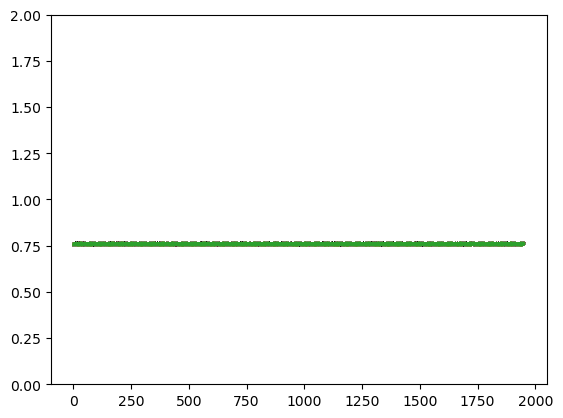

In [30]:
plt.ylim(0,2)
plt.plot(x[:,max_bins]);

print(f"std: {np.std(x[:,max_bins])}")

print(f"mean: {np.mean(x[:,max_bins])}")